In [1]:
# Pandas using Sqlite (relating to Relational DB)
import sqlite3
# Step 1: Create a connection object
conn = sqlite3.connect('D:\\Python\\Prac\\DataSets\\flights.db')


In [2]:
# Step 2: Create a cursor object
cur = conn.cursor()
# Step 3: Execute a sql query
cur.execute('select * from airlines limit 5;')

# Step 4: Fetch our Records
result = cur.fetchall()
print(result)

[(0, '1', 'Private flight', '\\N', '-', None, None, None, 'Y'), (1, '2', '135 Airways', '\\N', None, 'GNL', 'GENERAL', 'United States', 'N'), (2, '3', '1Time Airline', '\\N', '1T', 'RNX', 'NEXTIME', 'South Africa', 'Y'), (3, '4', '2 Sqn No 1 Elementary Flying Training School', '\\N', None, 'WYT', None, 'United Kingdom', 'N'), (4, '5', '213 Flight Unit', '\\N', None, 'TFU', None, 'Russia', 'N')]


In [9]:
#mapping our data set (airports)
coords = cur.execute("""
    Select 
        cast(longitude as float),
        cast(latitude as float)
    From
        airports;
""").fetchall()

C:\Users\MYPC\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\MYPC\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


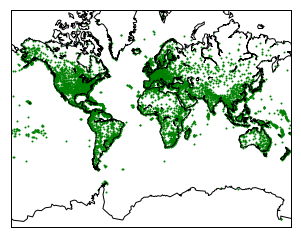

In [34]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline 

m = Basemap(projection = 'merc', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180,urcrnrlon = 180, lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawmapboundary()

x, y = m([l[0] for l in coords], [l[1] for l in coords])

m.scatter(x,y,1,marker='o',color='green')

In [14]:
# Pandas --> Display Formatted Results
import pandas as pd
# Read our Results
df = pd.read_sql_query("select * from airlines limit 5;", conn)
print(df)

   index id                                          name alias  iata  icao  \
0      0  1                                Private flight    \N     -  None   
1      1  2                                   135 Airways    \N  None   GNL   
2      2  3                                 1Time Airline    \N    1T   RNX   
3      3  4  2 Sqn No 1 Elementary Flying Training School    \N  None   WYT   
4      4  5                               213 Flight Unit    \N  None   TFU   

  callsign         country active  
0     None            None      Y  
1  GENERAL   United States      N  
2  NEXTIME    South Africa      Y  
3     None  United Kingdom      N  
4     None          Russia      N  


In [17]:
# Pandas basic operations:

# Fetch specific column name
df["country"]

0              None
1     United States
2      South Africa
3    United Kingdom
4            Russia
Name: country, dtype: object

In [18]:
# Fetch all column names
df.columns

Index(['index', 'id', 'name', 'alias', 'iata', 'icao', 'callsign', 'country',
       'active'],
      dtype='object')

In [19]:
# Top 3 rows
df.head(3)

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y


In [20]:
# Last 3 rows
df.tail(3)

,index,id,name,alias,iata,icao,callsign,country,active
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N


In [30]:
# CRUD OPERATIONS

# Inserting Rows using Pandas
# cur = conn.cursor()
cur.execute("insert into airlines values(6048,19486,'Test Flight','','',null,null,null,'Y');")
conn.commit()
pd.read_sql_query("select * from airlines where id = 19486;" ,conn)
                  
                  

,index,id,name,alias,iata,icao,callsign,country,active
0,6048,19486,Test Flight,,,None,None,None,Y
1,6048,19486,Test Flight,,,None,None,None,Y
2,6048,19486,Test Flight,,,None,None,None,Y
